# Activity on Unsupervised Learning

# Submitted by : SRUTHY B S

HELP International is an international humanitarian NGO that is committed to fighting
poverty and providing the people of backward countries with basic amenities and
relief during the time of disasters and natural calamities. After the recent project that
included a lot of awareness drives and funding programmes, they have been able to
raise around $ 10 million. The significant issues that come while making this decision
are mostly related to choosing the countries that are in the direst need of aid.
How will you help this NGO to make a correct decision based on socio-economic
and health factors

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
data=pd.read_csv("Downloads/Data science/Activity9-Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [136]:
data['country'].nunique()

167

In [137]:
data.shape

(167, 10)

In [138]:
data1=data.drop(['country'],axis=1)

In [139]:
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [140]:
data1.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Dimensionality reduction

In [141]:
#we transform whole data into two components based on socio-economic and health factors
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df = pd.DataFrame(pca.fit_transform(data1), columns=["1", "2"])

In [142]:
df.head()

,1,2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151


# K-Mean clustering

In [143]:
#let number of clusters = 2
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=42)
y_means1=kmeans.fit_predict(df)

In [144]:
y_means1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [145]:
#silhouette score
score_hc1 = silhouette_score(df, y_means1, metric='euclidean')
print('Silhouette Score:', round(score_hc1,2))

Silhouette Score: 0.73


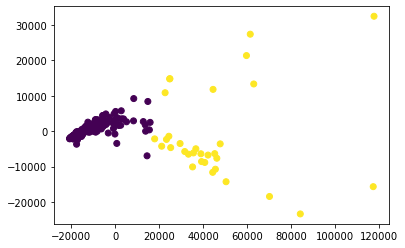

In [149]:
#visualization
plt.scatter(df['1'],df['2'],c=y_means1)
plt.show()


In [150]:
#To find optimum value of clusters
from sklearn.cluster import KMeans
ks=range(1,9)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(df)
    inertia.append(model.inertia_)
    print(model.inertia_)

117459279324.62862
36527983204.191864
21709816385.25594
14610328566.708189
10655013039.805529
7655367831.272914
5353422098.543845
4258565214.069536


Text(0.5, 1.0, 'The Elbow Method')

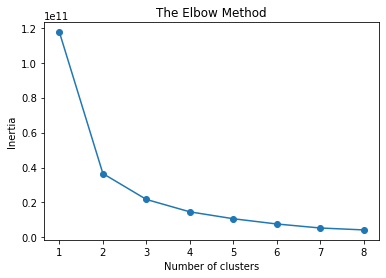

In [151]:
plt.plot(ks,inertia,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')

In [152]:
#let optimum number of clusters = 4
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_means2=kmeans.fit_predict(df)

In [153]:
y_means2

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0])

In [154]:
# Silhouette Score
from sklearn.metrics import silhouette_score
score_hc1 = silhouette_score(df, y_means2, metric='euclidean')
print('Silhouette Score:', round(score_hc1,2))

Silhouette Score: 0.61


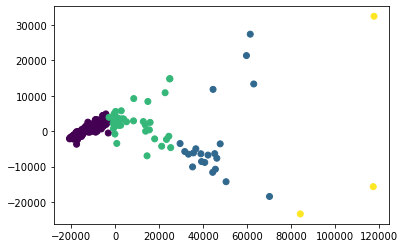

In [155]:
#visualization
plt.scatter(df['1'],df['2'],c=y_means2)
plt.show()


# Agglomorative Clustering

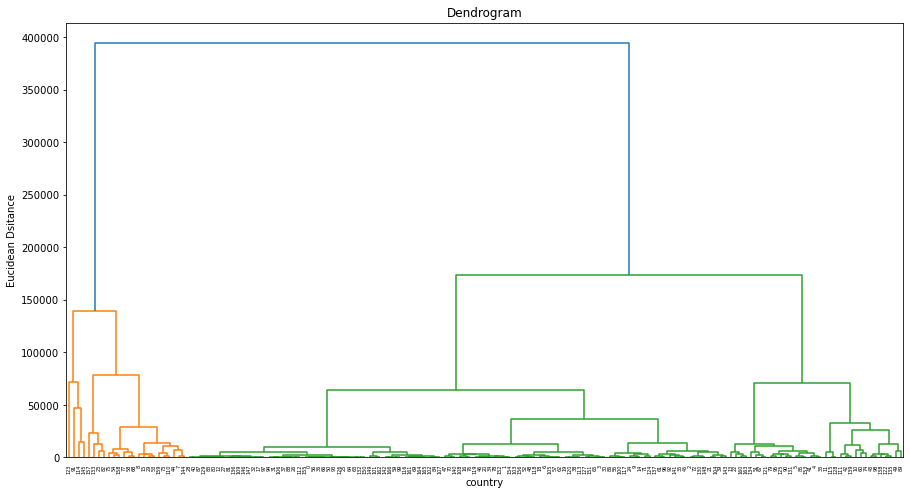

In [157]:
#To find optimum number of clustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(data1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('country')
plt.ylabel('Eucidean Dsitance')
plt.show()

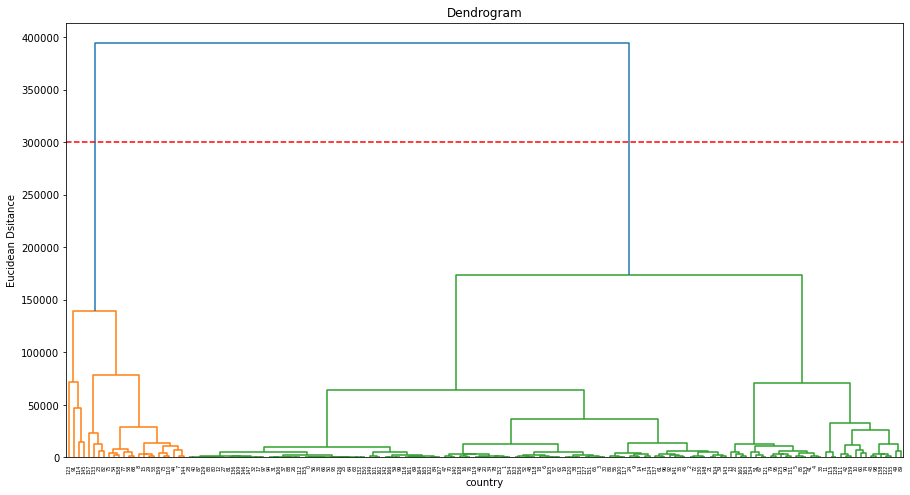

In [158]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(data1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('country')
plt.ylabel('Eucidean Dsitance')
plt.hlines(300000,0,5000,color='red',linestyle='dashed')
plt.show()

In [159]:
#let number of clusters = 2
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df)

In [160]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [161]:
# Silhouette Score
from sklearn.metrics import silhouette_score
score_hc1 = silhouette_score(df, y_hc, metric='euclidean')
print('Silhouette Score:', round(score_hc1,2))

Silhouette Score: 0.72


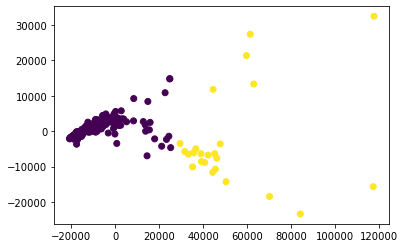

In [162]:
#visualization
plt.scatter(df['1'],df['2'],c=y_hc)
plt.show()


# Conclusion

Since silhouette score higher for number of clusters 2 in both K-Means clustering and Agglomerative clustering we can take that for making a decision
for choosing the countries that are in the direct need of aid. 

Also K-Means clustering have more silhouette score than Agglomerative. So we use K-Mean Clustering for finding countries that are in direct need of aid. 

In [167]:
k=data.loc[y_means1==0].index

In [168]:
d=data.loc[k]

In [176]:
d

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [170]:
p=data.loc[y_means==1].index

In [171]:
l=data.loc[p]

In [172]:
l

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600


More direct need of aid is required for countries which have low income.

From above two data we can find those countries which need more direct aid. That is the countries which are clustered as 0 in y_means1.

In [177]:
import numpy as np
countries=np.array(d['country'])

In [181]:
print("The countries that require direct need of aid are : \n \n",countries)

The countries that require direct need of aid are : 
 
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados'
 'Belarus' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Czech Republic' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Fiji'
 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hungary' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Macedonia, FYR' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauriti